In [2]:
from scipy.io import loadmat
cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
feature_ims = clust['clusters']['clusters'][0][0]

In [3]:
import sklearn.cluster
from sklearn.metrics import silhouette_score
clusters_try = np.arange(2, 20)
# clusters_try = np.arange(2, 3)
inertia = np.zeros((len(clusters_try),))
silhouette_avg = np.zeros((len(clusters_try),))
for ii, n_clusters in enumerate(clusters_try):
    cls = sklearn.cluster.KMeans(n_clusters)
    clust_reshaped = np.reshape(feature_ims, [31**2, 150]).T
    clabs = cls.fit_predict(clust_reshaped)
    order = np.concatenate([np.where(clabs==cc)[0] for cc in np.unique(clabs)])
    inertia[ii] = cls.inertia_
    silhouette_avg[ii] = silhouette_score(clust_reshaped, clabs)
    

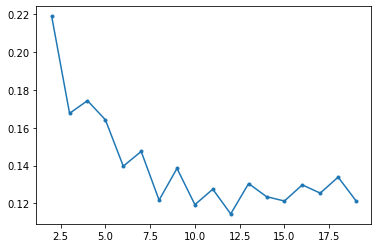

In [4]:
plt.figure();
# plt.plot(clusters_try, inertia, '.')
plt.plot(clusters_try, silhouette_avg, '.-')

In [5]:
n_clusters = 5;
cls = sklearn.cluster.KMeans(n_clusters)
clust_reshaped = np.reshape(feature_ims, [31**2, 150]).T
clabs = cls.fit_predict(clust_reshaped)
order = np.concatenate([np.where(clabs==cc)[0] for cc in np.unique(clabs)])

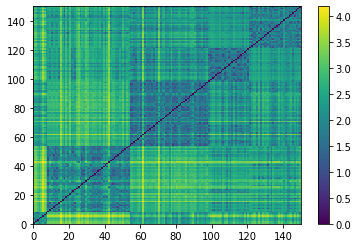

In [6]:
import scipy.spatial
clust_reshaped_ordered = clust_reshaped[order,:]
cluster_dist = scipy.spatial.distance.squareform(\
                     scipy.spatial.distance.pdist(clust_reshaped_ordered, metric='Euclidean'))

plt.figure();
plt.pcolormesh(cluster_dist)
plt.colorbar()

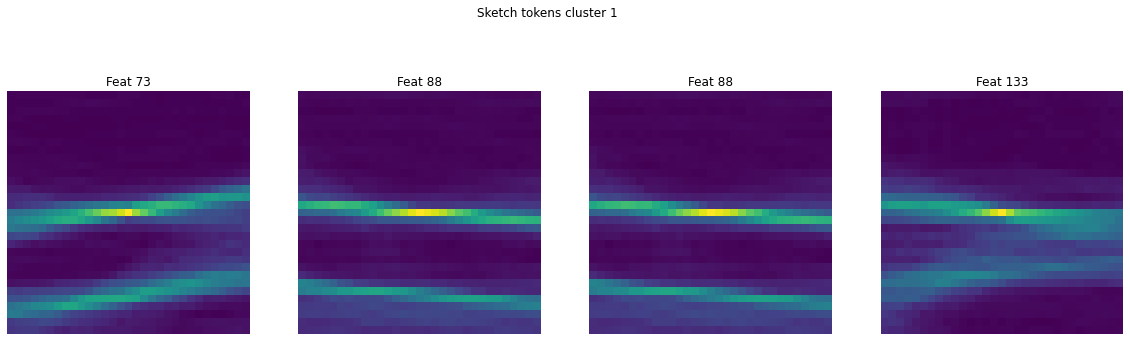

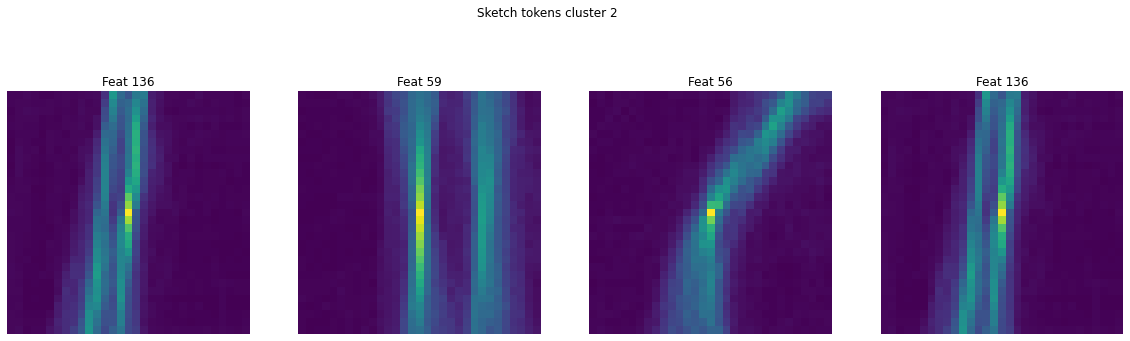

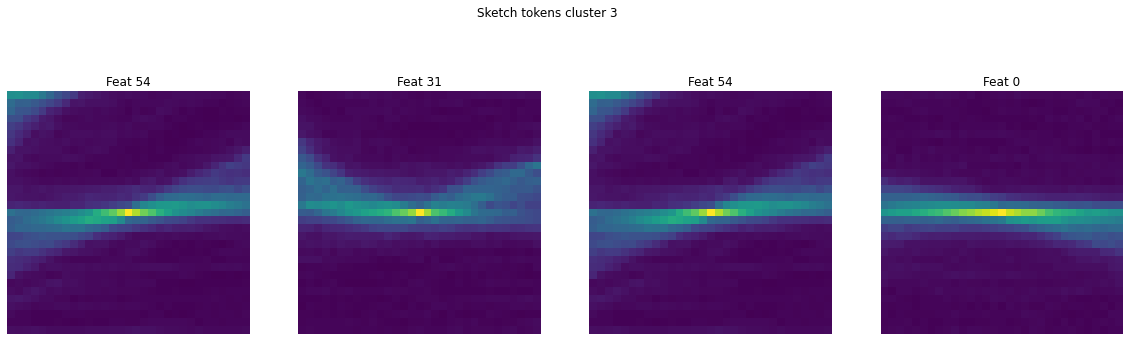

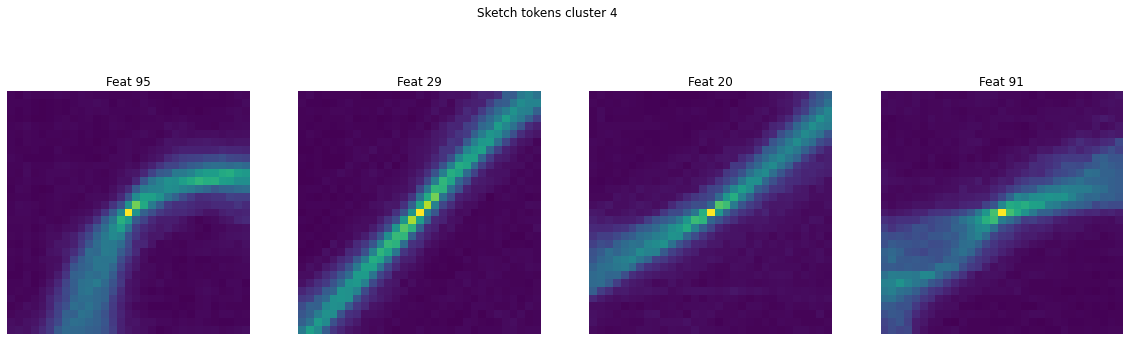

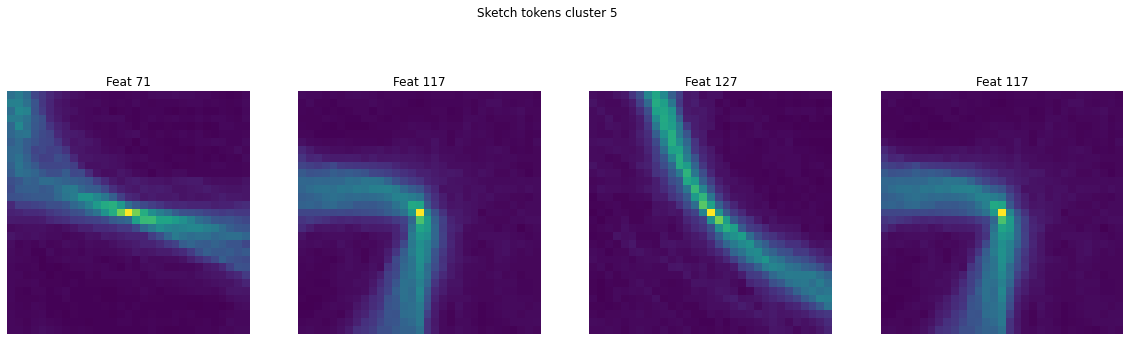

In [7]:

n2plot = 4
npx = 1; npy = 4;

for cluster_index in range(n_clusters):
    
    clusters2plot = np.random.choice(np.where(clabs==cluster_index)[0], n2plot)

    plt.figure(figsize=(20,6))
    for ci,cc in enumerate(clusters2plot):

        plt.subplot(npx,npy,ci+1)
        plt.pcolormesh(feature_ims[:,:,cc])
        plt.axis('square')
        plt.axis('off')
        plt.gca().invert_yaxis()
        plt.title('Feat %d'%(cc))

    plt.suptitle('Sketch tokens cluster %d'%(cluster_index+1))